# Decision tree

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay


In [2]:
df = pd.read_csv("../Data/adjusted_data.csv", sep=';')

In [ ]:
X = df.drop("Target", axis=1)

# List of columns to scale
cols_to_scale = [
    'Application order',
    'Daytime/evening attendance\t',
    'Previous qualification (grade)',
    'Admission grade',
    'Age at enrollment',
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)',
    'Unemployment rate',
    'Inflation rate',
    'GDP'
]

scaler = RobustScaler()
X[cols_to_scale] = scaler.fit_transform(X[cols_to_scale])
# Specify which columns to one-hot encode
cols_to_encode = [
    'Previous qualification',
    'Mother\'s qualification', 
    'Father\'s qualification', 
    'Mother\'s occupation', 
    'Father\'s occupation', 
    'Course', 
    'Marital status'
]

# Create a column transformer that applies OneHotEncoder to specified columns
# and passes through the rest unchanged
preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cols_to_encode)
    ],
    remainder='passthrough'
)

preprocessor.fit(X)
X = preprocessor.transform(X)
X = pd.DataFrame(X, columns=preprocessor.get_feature_names_out())

#print(X.head())
# Use a 1D target array (LogisticRegression expects y to be 1D for multiclass)
y = df["Target"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)



In [26]:
depth = []
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    # Perform 7-fold cross validation 
    scores = cross_val_score(estimator=clf, X=X, y=y, cv=7, n_jobs=4)
    depth.append((i,scores.mean()))
print(depth)

[(3, np.float64(0.7344032549728753)), (4, np.float64(0.7459312839059675)), (5, np.float64(0.7486437613019891)), (6, np.float64(0.7515822784810126)), (7, np.float64(0.7477396021699819)), (8, np.float64(0.7389240506329112)), (9, np.float64(0.7319168173598554)), (10, np.float64(0.7271699819168174)), (11, np.float64(0.7188065099457505)), (12, np.float64(0.719258589511754)), (13, np.float64(0.7117992766726944)), (14, np.float64(0.7052441229656419)), (15, np.float64(0.7007233273056057)), (16, np.float64(0.6962025316455696)), (17, np.float64(0.6871609403254973)), (18, np.float64(0.6903254972875226)), (19, np.float64(0.6842224231464736))]


In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x_train, y_train)

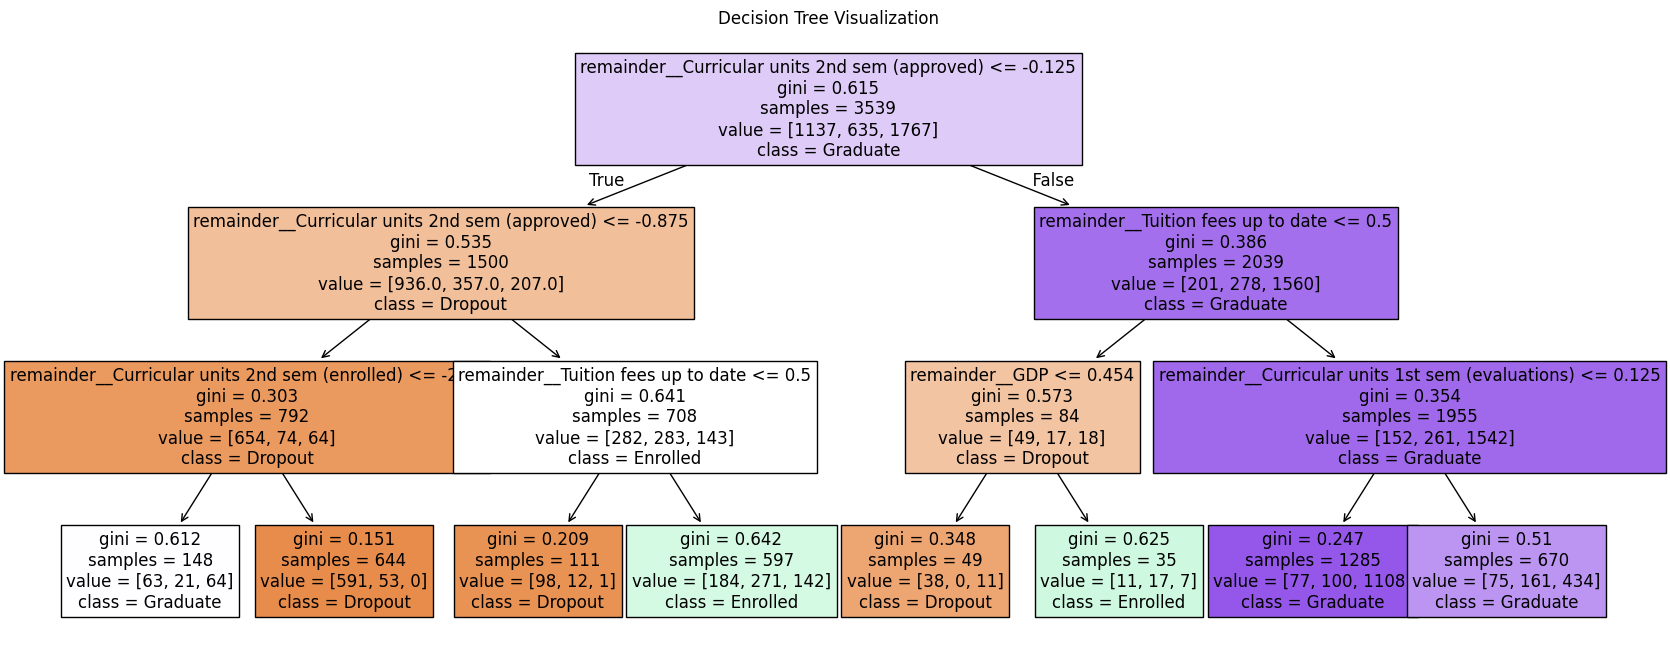

In [23]:
target_names = [str(c) for c in clf.classes_]
feature_names = X.columns
target_names = clf.classes_.astype(str)  # clf is the DecisionTreeClassifier

plt.figure(figsize=(20, 8))
tree.plot_tree(
    clf,
    filled=True,
    feature_names=feature_names,
    class_names=target_names,
    fontsize=12
)
plt.title('Decision Tree Visualization')
plt.savefig('../Figures/tree_vis.png', dpi=400, bbox_inches='tight')
plt.show()

In [11]:
accuracy_score(clf.predict(x_test), y_test)

0.7333333333333333

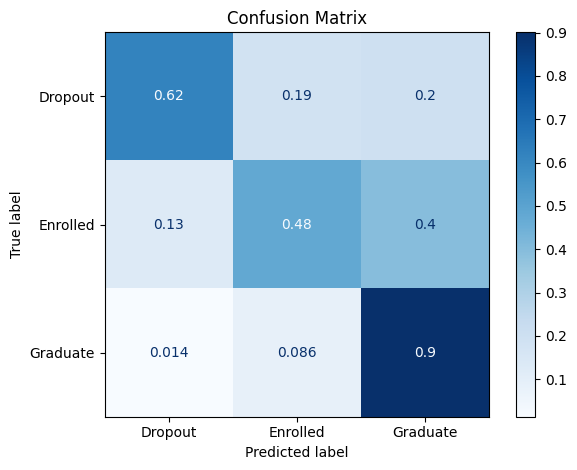

In [22]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf = clf.fit(x_train, y_train)

ConfusionMatrixDisplay.from_estimator(clf, x_test, y_test, cmap="Blues", normalize='true')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [16]:
accuracies_test = []
accuracies_train = []
max_acc = 0
for i in range(1,40):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(x_train, y_train)
    acc_test = accuracy_score(clf.predict(x_test), y_test)
    accuracies_test.append(acc_test)
    print(f'Depht = {i} and accuracy = {acc_test}')
    if acc_test > max_acc:
        max_acc = acc_test
        depth = i 
    acc_train = accuracy_score(clf.predict(x_train), y_train)
    accuracies_train.append(acc_train)

print(f'Best acc = {max_acc} with depth = {depth}')

Depht = 1 and accuracy = 0.7062146892655368
Depht = 2 and accuracy = 0.7163841807909604
Depht = 3 and accuracy = 0.7333333333333333
Depht = 4 and accuracy = 0.735593220338983
Depht = 5 and accuracy = 0.7559322033898305
Depht = 6 and accuracy = 0.7310734463276836
Depht = 7 and accuracy = 0.7288135593220338
Depht = 8 and accuracy = 0.7254237288135593
Depht = 9 and accuracy = 0.7254237288135593
Depht = 10 and accuracy = 0.7220338983050848
Depht = 11 and accuracy = 0.7050847457627119
Depht = 12 and accuracy = 0.711864406779661
Depht = 13 and accuracy = 0.7062146892655368
Depht = 14 and accuracy = 0.6915254237288135
Depht = 15 and accuracy = 0.6915254237288135
Depht = 16 and accuracy = 0.6870056497175141
Depht = 17 and accuracy = 0.6757062146892655
Depht = 18 and accuracy = 0.6757062146892655
Depht = 19 and accuracy = 0.6745762711864407
Depht = 20 and accuracy = 0.6847457627118644
Depht = 21 and accuracy = 0.6700564971751413
Depht = 22 and accuracy = 0.6734463276836158
Depht = 23 and accura

In [17]:
for i in range(len(accuracies_test)):
    print(f'Test accuracy = {accuracies_test[i]} and train accuracy = {accuracies_train[i]}')

Test accuracy = 0.7062146892655368 and train accuracy = 0.705283978525007
Test accuracy = 0.7163841807909604 and train accuracy = 0.7143260808137892
Test accuracy = 0.7333333333333333 and train accuracy = 0.7406046905905623
Test accuracy = 0.735593220338983 and train accuracy = 0.7496467928793444
Test accuracy = 0.7559322033898305 and train accuracy = 0.7753602712630686
Test accuracy = 0.7310734463276836 and train accuracy = 0.7900536874823396
Test accuracy = 0.7288135593220338 and train accuracy = 0.820288217010455
Test accuracy = 0.7254237288135593 and train accuracy = 0.8437411698219837
Test accuracy = 0.7254237288135593 and train accuracy = 0.8705849109918056
Test accuracy = 0.7220338983050848 and train accuracy = 0.8940378638033343
Test accuracy = 0.7050847457627119 and train accuracy = 0.909861542808703
Test accuracy = 0.711864406779661 and train accuracy = 0.9273806159932184
Test accuracy = 0.7062146892655368 and train accuracy = 0.9434868606951116
Test accuracy = 0.691525423728